## ASTR 310 Lecture 26 (ODEs)

### Exercise 1

Use `scipy.integrate.solve_ivp` to integrate the Friedmann equation describing the expansion of a universe containing matter and a cosmological constant:
$$ \frac{\dot{a}}{a} = H_0 \sqrt{\frac{\Omega_{m0}}{a^3} + \Omega_{\Lambda0} + \frac{1-\Omega_{m0}-\Omega_{\Lambda0}}{a^2}} $$

Here $H_0 \approx 68$ km s$^{-1}$ Mpc$^{-1} = 2.2\times 10^{-18}$ s$^{-1}$ is the Hubble constant. Integrate $a(t)$ starting from $a(0) = 10^{-6}$ and continue until $t = 1/H_0$. Try the following two models:

$$ \Omega_{m0} = 0.3, \Omega_{\Lambda0} = 0.7$$
$$ \Omega_{m0} = 1.0, \Omega_{\Lambda0} = 0.0. $$



Plot $a(t)$ for each model versus time. When is $a(t) = 1$?  (Interpolate, don't just eyeball it.)

In [74]:
# Code here
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

H0 = 2.2*10**-18
# scipy.interpolate.interp1d
def friedmann_eq(t, a, H0, Omega_m0, omega_a0) :
    return H0 * a * np.sqrt(Omega_m0 / a**3 + omega_a0 + (1 - Omega_m0 - omega_a0) / a**2)
time_ = (0,1/H0)
a_dot = [10**-6]
var1 ,var2 = (H0, 0.3, 0.7),(H0, 1.0, 0.0)
res1 = solve_ivp(friedmann_eq, time_, a_dot, args=var1, dense_output=True)
res2 = solve_ivp(friedmann_eq, time_, a_dot, args=var2, dense_output=True)

res1,res2,res1.t,res2.t,res1.y,res2.y,res1.success,res2.success
# studying the various returns based on the lecture
res1.y[0],res2.y[0] #stupid resresentation

(array([1.00000000e-06, 1.00000000e-06, 1.00000000e-06, 1.00000000e-06,
        1.00000000e-06, 1.00000000e-06, 1.00000001e-06, 1.00000013e-06,
        1.00000134e-06, 1.00001339e-06, 1.00013388e-06, 1.00133843e-06,
        1.01334435e-06, 1.12976489e-06, 2.08388321e-06, 6.69509552e-06,
        1.80341316e-05, 4.93563865e-05, 1.25679380e-04, 2.73775647e-04,
        5.47011747e-04, 1.05294212e-03, 1.97413645e-03, 3.63819921e-03,
        6.63358793e-03, 1.20181204e-02, 2.16927263e-02, 3.90726018e-02,
        7.02921399e-02, 1.26363033e-01, 2.26995578e-01, 4.07440863e-01,
        7.45088034e-01, 1.03625291e+00]),
 array([1.00000000e-06, 1.00000000e-06, 1.00000000e-06, 1.00000000e-06,
        1.00000000e-06, 1.00000000e-06, 1.00000002e-06, 1.00000024e-06,
        1.00000244e-06, 1.00002444e-06, 1.00024443e-06, 1.00244295e-06,
        1.02429745e-06, 1.23152076e-06, 2.79190889e-06, 8.53285368e-06,
        2.40332139e-05, 7.29595400e-05, 1.68917949e-04, 3.50437337e-04,
        6.90190208e-04

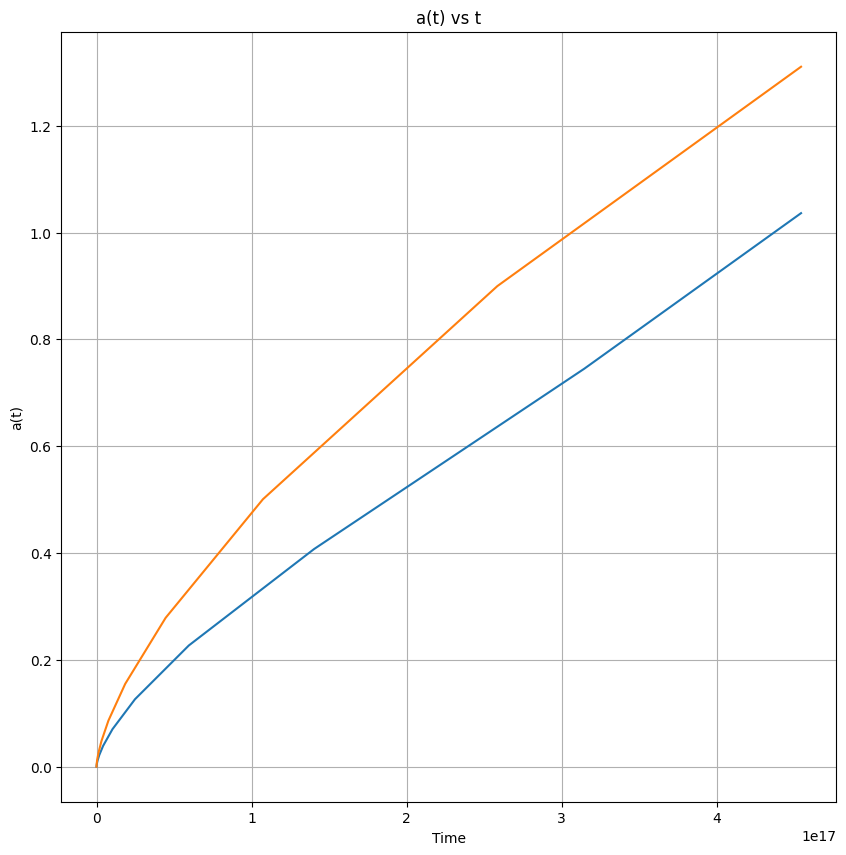

In [75]:
plt.figure(figsize=(10,10))
plt.plot(res1.t,res1.y[0])
plt.plot(res2.t,res2.y[0])
plt.xlabel("Time")
plt.ylabel("a(t)")
plt.title("a(t) vs t")
plt.grid()



In [76]:
from scipy.optimize import fsolve
interp1 = interp1d(res1.t,res1.y[0]-1,kind="cubic")
interp2 = interp1d(res2.t,res2.y[0] -1,kind="cubic")
sol1 = fsolve(interp1,res1.t[-1] /2) #whena(t) -1 =0 
sol2 = fsolve(interp2,res2.t[-1] /2)
sol1,sol2

(array([4.38476085e+17]), array([3.04221947e+17]))

### Exercise 2

Numerical simulations of star formation often start with a structure called an isothermal sphere.  It is assumed to be temporarily in hydrostatic equilibrium until some external disturbance or shock drives it into collapse.  What’s the density structure of this object?

Hydrostatic equilibrium:  $dP = -\rho \frac{GM(r)}{r^2}\:dr$

Mass continuity:  $dM(r) = 4 \pi r^2 \rho \:dr$

Ideal gas equation of state: $ P = \rho k_B T/(\mu m_H),$  with $T = $ some known constant.

These can be combined into one 2nd order equation:
$$ \frac{d^2 \rho}{dr^2} = \frac{1}{\rho} \biggl(\frac{d\rho}{dr}\biggr)^2 - \frac{2}{r}\frac{d\rho}{dr} - 2\rho^2. $$

(Along the way we switched to dimensionless parameters to make the constants easier to deal with.  For example, $r \rightarrow r/r_0$ for some appropriate definition of $r_0$.)

Solve that 2nd order equation with the initial conditions $\rho(r_0) = 1$ and $\frac{d\rho}{dr}\biggr|_{r0} = 0.$ Unlike the singular isothermal sphere ($\rho \propto r^{-2}$), these conditions make a physically plausible structure which has a finite density and a smooth gradient at the center.  Technically we would like to evaluate those conditions at $r_0 = 0$ but in practice we will have to evaluate at $r_0 = 0.01$ which (as you will see) is small enough to be far away from all of the action.  Solve over the range $r_0 = (0.01,10)$ and plot the solution, along with the singular isothermal sphere. 


In [77]:
# Code here
def df(r,y):
    y1,y2 = y
    if (r == 0):
        return [y2,0]
    dydr = y2
    dy2dr = (1/y1) * y2**2 - (2/r) * y2 - 2 * y1**2
    return [dydr,dy2dr]
r = 0.01
r_max = 10
init_ = [1,0]
res1 = solve_ivp(df,[r,r_max],init_,dense_output=True)
res1.y[0]
res1.sol

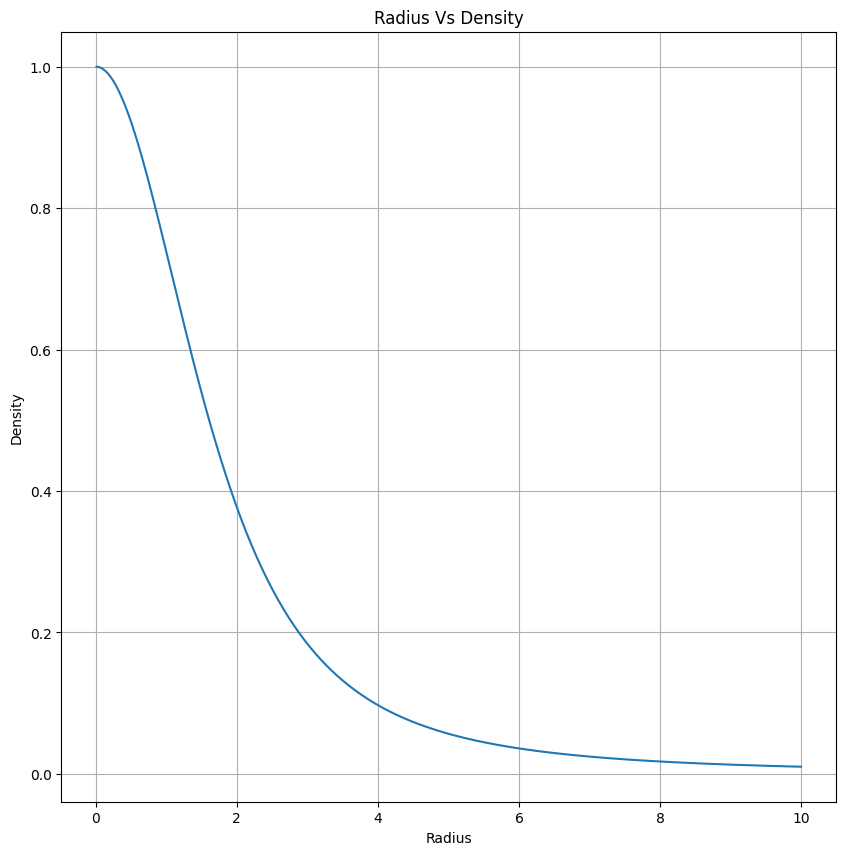

In [78]:
rs = np.linspace(r, r_max, 400)
vals = res1.sol(rs)[0] 
# rho_values
plt.figure(figsize=(10,10))
plt.plot(rs,vals)
# plt.plot(rs,rs**-2)
plt.xlabel("Radius")
plt.ylabel("Density")
plt.title("Radius Vs Density")
plt.grid()

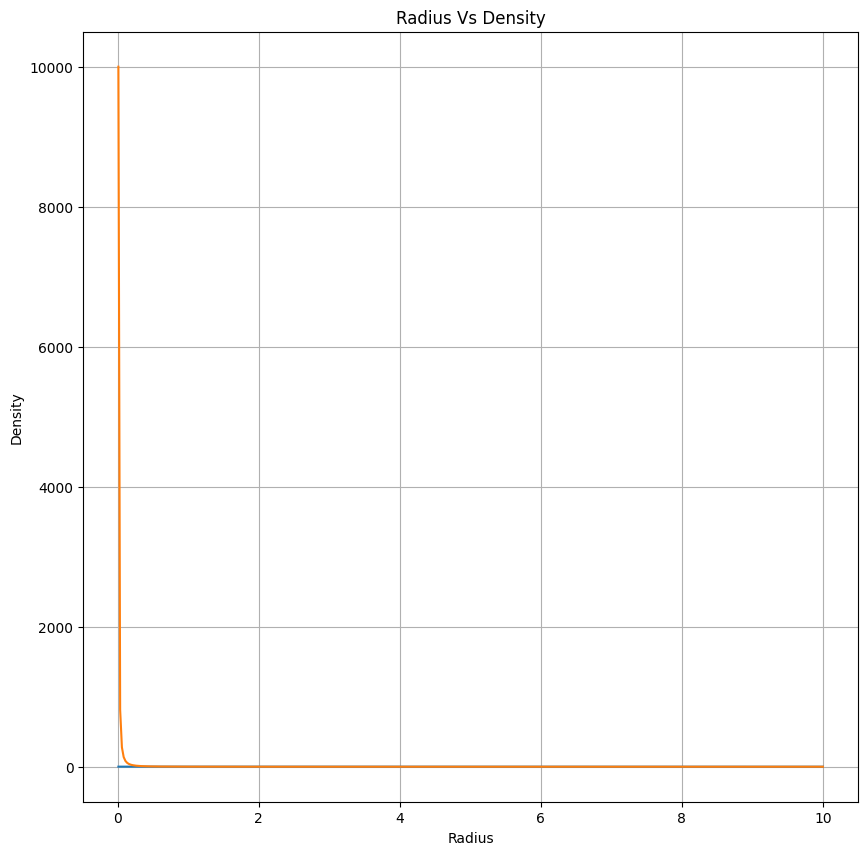

In [79]:
plt.figure(figsize=(10,10))
plt.plot(rs,vals)
plt.plot(rs,rs**-2)
plt.xlabel("Radius")
plt.ylabel("Density")
plt.title("Radius Vs Density")
plt.grid()

### Extra Credit: planet in a binary star system

Use leapfrog integration to solve and plot the orbit of a planet in a binary star system in which the stars are moving in a circular orbit. Ignore the gravity of the planet.

... see the PDF for the relevant equations and constants ...

Run until $t = 2.8\times 10^{10}$ s with $\Delta t = 1.4\times 10^7$ s.  For initial conditions, use $x_p(0) =$ (62.1 AU, 0) and $v_p(0) = (0, 6.79\times 10^5$ cm/s).

https://stackoverflow.com/questions/65215994/leap-frog-algorith-for-solving-two-body-problem
where I took hint from

 = 0.
dt = timestep
t_final = end time
x = initial position
v = initial velocity
a = acceleration(x, t)
v = v + 0.5*a*dt # half Euler step to get started
while t < t_final:
x = x + v*dt
t = t + dt
a = acceleration(x, t)
v = v + a*dt
You will need to modify this implementation if
you want to preserve all the intermediate
values.
modify this logic for the given eq

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


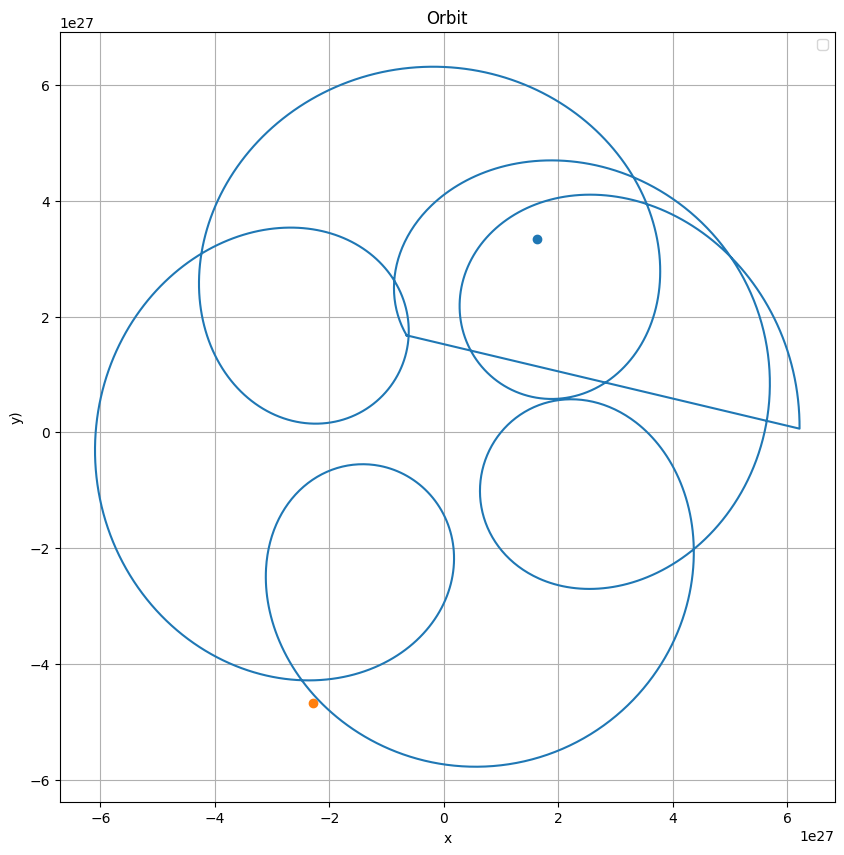

In [97]:
# Code here
G = 6.67*10**-8
M1 = 0.73 * 1.989*10**33 
M2 = 0.52 * 1.989*10**33 
a = 89.2 * 1.495*10**13 
P = (2 * np.pi) * np.sqrt(a**3 / (G * (M1 + M2)))  
t_final = 2.8*10**10 
dt = 1.4*10**7 
timestep = int(t_final / dt)

x_p = np.array([62.1 * 1.495*10**13, 0]) 
vp = np.array([0, 6.79*10**5]) 
x1 = np.array([a * M2 / (M1 + M2), 0])
x2 = np.array([-a * M1 / (M1 + M2), 0])  
pl_pos = [x_p]

for i in range(timestep):
    t = i * dt
    theta = 2 * np.pi * t / P
    x1 = (a * M2 / (M1 + M2)) * np.array([np.cos(theta), np.sin(theta)])
    x2 = (a * M1 / (M1 + M2)) * np.array([np.cos(theta + np.pi), np.sin(theta + np.pi)])
    if i == 0:
        inc = -G * (M1 * (xp - x1) / np.linalg.norm(x_p - x1)**3 + M2 * (x_p - x2) / np.linalg.norm(x_p - x2)**3)
        vp += inc * (dt / 2)
    x_p += vp * dt
    inc = -G * (M1 * (x_p - x1) / np.linalg.norm(x_p - x1)**3 + M2 * (x_p - x2) / np.linalg.norm(x_p - x2)**3)

    vp += inc * dt
    pl_pos.append(x_p.copy()) #weird how I have to attach a copy to plot
vp -= inc * (dt / 2)
pl_pos = np.array(pl_pos)
plt.figure(figsize=(10, 10))
plt.plot(pl_pos[:, 0] / 1.495*10**13, pl_pos[:, 1] / 1.495*10**13)
plt.scatter(x1[0] / 1.495*10**13, x1[1] / 1.495*10**13)
plt.scatter(x2[0] / 1.495*10**13, x2[1] / 1.495*10**13)
plt.xlabel('x')
plt.ylabel('y)')
plt.title('Orbit')
plt.legend()
plt.grid()

